# Aula 15

# Exemplo de visão estéreo

### Eduardo Lobo Lustosa Cabral


## 1. Objetivos

Apresentar a solução de um problema de visão estéreo usando uma RNA.




### Importação das principais bibliotecas

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob
import os

print(tf.__version__)

2.8.2


## 2. Conjunto de dados

O conjunto de dados que vamos utilizar nessa aula é o "New Tsukuba Stereo Dataset" (https://home.cvlab.cs.tsukuba.ac.jp/dataset).

Esse conjunto de dados é composto por quase 1.800 pares de imagens com dimensão 480x480 pixels. Portanto, temos que carregá-lo em versão compactada para depois descompactar.


### 2.1 Carregar conjunto de dados

A célula abaixo instala o `gdown` para carregar um arquivo que está no Google Drive e depois carrega esse arquivo no diretório local "/tmp" do Colab.

In [4]:
!pip install gdown
!gdown --id 143OsIIPUDVRsUT8NF2I7MidehK_m4-U- -O /tmp/tsukuba.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=143OsIIPUDVRsUT8NF2I7MidehK_m4-U-
To: /tmp/tsukuba.zip
100% 1.19G/1.19G [00:12<00:00, 96.6MB/s]


In [5]:
import os
import zipfile

local_zip = '/tmp/tsukuba.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

Após a descompressão do arquivo de dados é criado o diretório "/tmp/TsukubaStereo" com dois subdiretórios: "images" e "disparityl", onde estão as imagens e os mapas de disparidades. 

O diretório "images" é subdividido nos diretórios "left" e "right" onde ficam as imagens das câmeras esquerda e direita respectivamente. O diretório "disparity" é subdividido nso diretórios "left" e "right" onde ficam os mapas de diretórios referentes às imagens da esquerda e da direita respectivamente. Nesse exemplo vamos usar o mapa de disparidade referente è câmera da esquerda.

Na célula abaixo são criadas as listas dos arquivos contidos nesses diretórios.

In [6]:
# Define diretório onde se encontram as imagens
left_image_path = '/tmp/TsukubaStereo/images/left'
right_image_path = '/tmp/TsukubaStereo/images/right'


# Escolhe tipos de arquivos desejados
glob_left_imgs = os.path.join(left_image_path, '*.png')
glob_right_imgs = os.path.join(right_image_path, '*.png')


# Cria lista dos nomes dos arquivos
left_img_paths = glob(glob_left_imgs)
right_img_paths = glob(glob_right_imgs)


# Ordena lista dos arquivos
left_img_paths.sort()
right_img_paths.sort()

# Apresenta numero de imagens
print('Número de imagens da esquerda:', len(left_img_paths))
print('Número de imagens da direita:', len(right_img_paths))
print(' ')

# Imprime nomes e paths dos 5 primeiros arquivos das listas
print('Nomes dos 5 primeiros arquivos das listas:')
print(' ')
print(left_img_paths[:5])
print(' ')
print(right_img_paths[:5])
print(' ')

Número de imagens da esquerda: 1800
Número de imagens da direita: 1800
Número de imagens de disparidade: 1800
 
Nomes dos 5 primeiros arquivos das listas:
 
['/tmp/TsukubaStereo/images/left/tsukuba_daylight_L_00001.png', '/tmp/TsukubaStereo/images/left/tsukuba_daylight_L_00002.png', '/tmp/TsukubaStereo/images/left/tsukuba_daylight_L_00003.png', '/tmp/TsukubaStereo/images/left/tsukuba_daylight_L_00004.png', '/tmp/TsukubaStereo/images/left/tsukuba_daylight_L_00005.png']
 
['/tmp/TsukubaStereo/images/right/tsukuba_daylight_R_00001.png', '/tmp/TsukubaStereo/images/right/tsukuba_daylight_R_00002.png', '/tmp/TsukubaStereo/images/right/tsukuba_daylight_R_00003.png', '/tmp/TsukubaStereo/images/right/tsukuba_daylight_R_00004.png', '/tmp/TsukubaStereo/images/right/tsukuba_daylight_R_00005.png']
 
['/tmp/TsukubaStereo/disparity/left/tsukuba_disparity_L_00001.png', '/tmp/TsukubaStereo/disparity/left/tsukuba_disparity_L_00002.png', '/tmp/TsukubaStereo/disparity/left/tsukuba_disparity_L_00003.png', 

In [7]:
# Importa função para embaralhar os dados
from sklearn.utils import shuffle

left_img_paths, right_img_paths = shuffle(left_img_paths, right_img_paths)

# Imprime nomes e paths dos 5 primeiros arquivos das listas
print('Nomes dos 5 primeiros arquivos das listas:')
print(' ')
print(left_img_paths[:5])
print(' ')
print(right_img_paths[:5])
print(' ')

Nomes dos 5 primeiros arquivos das listas:
 
['/tmp/TsukubaStereo/images/left/tsukuba_daylight_L_01485.png', '/tmp/TsukubaStereo/images/left/tsukuba_daylight_L_01028.png', '/tmp/TsukubaStereo/images/left/tsukuba_daylight_L_01176.png', '/tmp/TsukubaStereo/images/left/tsukuba_daylight_L_01128.png', '/tmp/TsukubaStereo/images/left/tsukuba_daylight_L_01199.png']
 
['/tmp/TsukubaStereo/images/right/tsukuba_daylight_R_01485.png', '/tmp/TsukubaStereo/images/right/tsukuba_daylight_R_01028.png', '/tmp/TsukubaStereo/images/right/tsukuba_daylight_R_01176.png', '/tmp/TsukubaStereo/images/right/tsukuba_daylight_R_01128.png', '/tmp/TsukubaStereo/images/right/tsukuba_daylight_R_01199.png']
 
['/tmp/TsukubaStereo/disparity/left/tsukuba_disparity_L_01485.png', '/tmp/TsukubaStereo/disparity/left/tsukuba_disparity_L_01028.png', '/tmp/TsukubaStereo/disparity/left/tsukuba_disparity_L_01176.png', '/tmp/TsukubaStereo/disparity/left/tsukuba_disparity_L_01128.png', '/tmp/TsukubaStereo/disparity/left/tsukuba_di

Para entender esse conjunto de dados vamos visualizar alguns pares de imagens e o mapa de disparidade.

Dimensões das imagens: (480, 640, 3)
Dimensões da imagem de disparidade: (480, 640, 3)
Valor máximo dos pixels das imagens: 255.0
Valor máximo da disparidade: 44.0


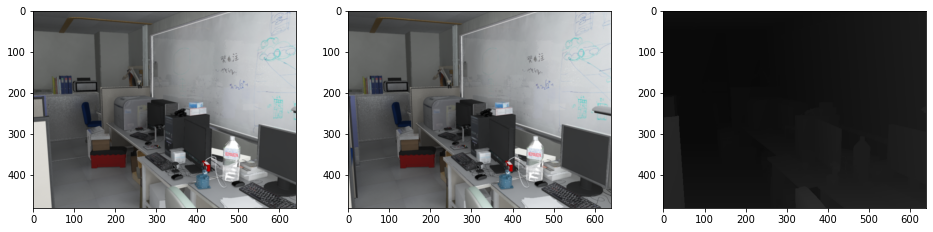

In [8]:
# Importa função para ler imagem
from keras.preprocessing.image import load_img, img_to_array

# Seleção da imagem
index = 1

# Carrega algumas imagens
img_left = load_img(left_img_paths[index])
img_right = load_img(right_img_paths[index])

# convert to numpy array
img_left = img_to_array(img_left)
img_right = img_to_array(img_right)

# Elimina 4o canal
img_left = img_left[:,:,:3]
img_right = img_right[:,:,:3]

# Mostra imagens 
f, pos = plt.subplots(1, 2, figsize=(16, 16))
pos[0].imshow(img_left/255)
pos[1].imshow(img_right/255)

# Mostra dimensões 
print('Dimensões das imagens:', img_left.shape)
print('Valor máximo dos pixels das imagens:', np.max(img_left))

heigth_orig = img_left[0]
weigth_orig = img_left[1]

### 2.2 Divisão dos dados em conjuntos de treinamento e validação

Como essa imagens foram obtidas em sequência, como se fosse um vídeo, e não vamos usar a informação temporal então temos que embaralhar os exemplos, antes de usá-los e antes de dividir os dados nos conjunto de treinamento e validação.

In [9]:
# Conjunto de dados de treinamento
train_left_img_paths = left_img_paths[:1500]
train_right_img_paths = right_img_paths[:1500]

# Conjunto de dados de validação
val_left_img_paths = left_img_paths[1500:]
val_right_img_paths = right_img_paths[1500:]

# Numero de exemplos
print(len(train_left_img_paths), len(train_right_img_paths))
print(len(val_left_img_paths), len(val_right_img_paths))

1500 1500 1500
300 300 300


## 3. Gerador de dados

A dimensão das imagens de entrada e o mapa de disparidade são 480x640x3 e o conjunto de dados de treinamento possui 1.500 exemplos e o de validação 300 exemplos. Assim, não é possível carregar todas essas em tensores, portanto, temos que usar geradores de dados para carregar os lote de exemplos de treinamento e de validação um de cada vez.

Na célula abaixo é criado um gerador que carrega as imagens dos diretórios onde se encontram e realiza as seguintes operações para criar os exemplos de treinamento e de validação:

1. Carrega as imagens da esquerda, da direita e o mapa de disparidade
2. Transforma as imagens em tensores
3. Redimensiona as imagens e o mapa de disparidade (essa imagens são muito grandes para o hardware disponível)
4. Normaliza as imagem de entrada para que os valores dos seus pixels sejam números reais entre 0 e 1

In [11]:
from keras.preprocessing.image import load_img, img_to_array

# Cria gerador para ser usado com o Keras
def batch_generator(left_img_paths, right_img_paths, img_size, m_exemplos, batchsize):
    # Inicializa loop infinito que termina no final do treinamento
    while True:
        
        # Loop para selecionar imagens de cada lote
        for start in range(0, m_exemplos, batchsize):
           
            # Inicializa lista de imagens com máscara e sem máscara
            batch_left_img, batch_right_img, batch_out_img = [], [], []
        
            end = min(start + batchsize, m_exemplos)
            for i in range(start, end):
                # Carrega images e o mapa de disparidade
                left_imagem = load_img(left_img_paths[i])
                right_imagem = load_img(right_img_paths[i])
                
                # Converet para tensor 
                left_imagem = img_to_array(left_imagem)
                right_imagem = img_to_array(right_imagem)

                # Elimina 4o canal
                left_imagem = left_imagem[:,:,:3]
                right_imagem = right_imagem[:,:,:3]
                
                # Redimensiona imagens e normaliza
                left_imagem = tf.image.resize(left_imagem, img_size)/255.
                right_imagem = tf.image.resize(right_imagem, img_size)/255.

                # Adiciona imagem original e segmentada aos lotes
                batch_left_img.append(left_imagem)
                batch_right_img.append(right_imagem)
                batch_out_img.append(right_imagem)
            
            yield [np.stack(batch_left_img, axis=0), np.stack(batch_right_img, axis=0)], [np.stack(batch_out_img, axis=0)]
            #Não tenho certeza se deixa o [] na saída

As duas células abaixo testam o gerador de dados nos exemplos de treinamento e de validação.

Dimensão dos tensores de imagens = (16, 240, 320, 3) (16, 240, 320, 3) (16, 240, 320) (16, 240, 320, 3)
Nomes dos arquivos:
/tmp/TsukubaStereo/images/left/tsukuba_daylight_L_01485.png
/tmp/TsukubaStereo/images/right/tsukuba_daylight_R_01485.png


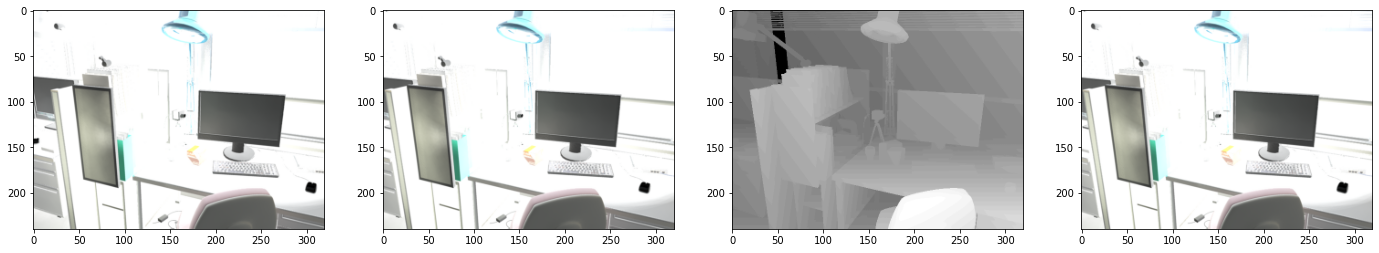

In [13]:
# Número de exemplos
m_train = len(train_left_img_paths)
m_val = len(val_left_img_paths)

# Define tamanho do lote
batch_size = 16

# Dimensão desejada para as imagens
img_size = (240, 320)


# Instancia o gerador de dados de treinamento
train_datagen = batch_generator(train_left_img_paths, train_right_img_paths, img_size, m_train, batchsize=batch_size)

# Usa o gerador uma vez
[left_img_batch, right_img_batch], [out_img_batch] = next(train_datagen)

# Apresenta dimensão dos tensores de entrada de saída
print('Dimensão dos tensores de imagens =', left_img_batch.shape, right_img_batch.shape, out_img_batch.shape)

# Mostra uma imagem dos lotes gerados
index = 0
print('Nomes dos arquivos:')
print(train_left_img_paths[index])
print(train_right_img_paths[index])
f, pos = plt.subplots(1, 3, figsize=(24, 16))
pos[0].imshow(left_img_batch[index])
pos[1].imshow(right_img_batch[index])
pos[2].imshow(out_img_batch[index])
plt.show()

Dimensão dos tensores de imagens = (16, 240, 320, 3) (16, 240, 320, 3) (16, 240, 320) (16, 240, 320, 3)
Nomes das imagens:
/tmp/TsukubaStereo/images/left/tsukuba_daylight_L_01686.png
/tmp/TsukubaStereo/images/right/tsukuba_daylight_R_01686.png


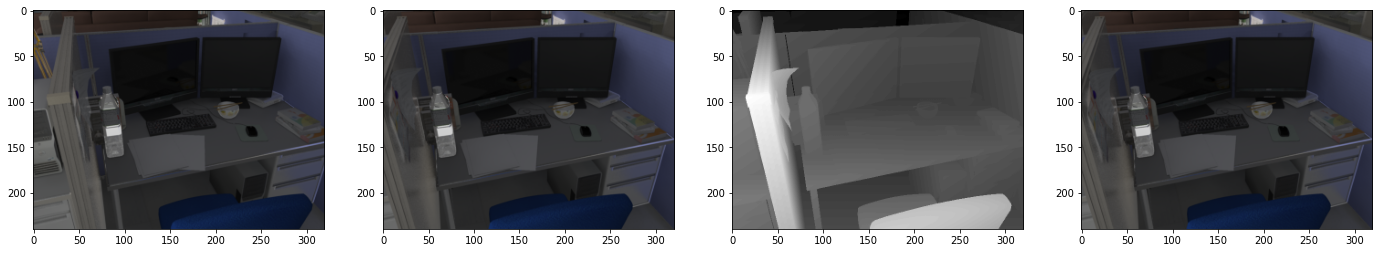

In [14]:
# Instancia o gerador de dados de validação
val_datagen = batch_generator(val_left_img_paths, val_right_img_paths, img_size, fdisp, m_val, batchsize=batch_size)

# Usa o gerador uma veze
[left_img_batch, right_img_batch], [out_img_batch] = next(val_datagen)

# Apresenta dimensão dos tensores de entrada de saída
print('Dimensão dos tensores de imagens =', left_img_batch.shape, right_img_batch.shape, out_img_batch.shape)

# Mostra uma imagem dos lotes gerados
index = 1
print('Nomes das imagens:')
print(val_left_img_paths[index])
print(val_right_img_paths[index])
f, pos = plt.subplots(1, 3, figsize=(24, 16))
pos[0].imshow(left_img_batch[index])
pos[1].imshow(right_img_batch[index])
pos[2].imshow(out_img_batch[index])
plt.show()

54.5

In [16]:
# Calcula números de lotes por época
train_steps = len(train_left_img_paths) // batch_size
val_steps = len(val_left_img_paths) // batch_size

print('Passos de treinamento:', train_steps)
print('Passos de validação:', val_steps)

Passos de treinamento: 93
Passos de validação: 18


## 4. Reconstrução

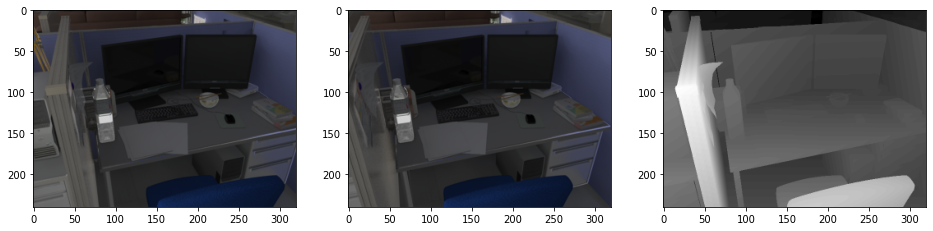

In [17]:
# Mostra uma imagem dos lotes gerados
index = 1
imgL = left_img_batch[index]
imgR = right_img_batch[index]

f, pos = plt.subplots(1, 2, figsize=(16, 16))
pos[0].imshow(imgL)
pos[1].imshow(imgR)
plt.show()

In [18]:
print(imgL.shape, imgR.shape)

(240, 320, 3) (240, 320, 3)


### Camada de reconstrução

In [19]:
# Classe para reconstrutor
class Reconstructor(tf.keras.layers.Layer):
    def __init__(self, height=40, width=40, num_channels=3, name="rec_img"):
        super(Reconstructor, self).__init__(name=name)
        self.height = height
        self.width = width
        self.num_channels = num_channels

    def compute_output_shape(self, input_shape):
        return [None, self.height, self.width, 1]

    def get_config(self):
        return {
            'height': self.height,
            'width': self.width,
        }
    
    def build(self, input_shape):
        print("Building Reconstruction Layer with input shape:", input_shape)

    def repeat(self, x, n_repeats):
        #with tf.variable_scope('_repeat'):
        rep = tf.tile(tf.expand_dims(x, 1), [1, n_repeats])
        return tf.reshape(rep, [-1])

    def interpolate(self, im, x, y, _num_batch):
        _height_f = tf.cast(self.height, tf.float32)
        _width_f  = tf.cast(self.width,  tf.float32)        

        # handle both texture border types
        _edge_size = 1
        im = tf.pad(im, [[0, 0], [1, 1], [1, 1], [0, 0]], mode='CONSTANT')
        x = x + _edge_size
        y = y + _edge_size

        x = tf.clip_by_value(x, 0.0,  _width_f - 1 + 2 * _edge_size)

        x0_f = tf.floor(x)
        y0_f = tf.floor(y)
        x1_f = x0_f + 1

        x0 = tf.cast(x0_f, tf.int32)
        y0 = tf.cast(y0_f, tf.int32)
        x1 = tf.cast(tf.minimum(x1_f,  _width_f - 1 + 2 * _edge_size), tf.int32)

        dim2 = (self.width + 2 * _edge_size)
        dim1 = (self.width + 2 * _edge_size) * (self.height + 2 * _edge_size)
        base = self.repeat(tf.range(_num_batch) * dim1, self.height * self.width)
        base_y0 = base + y0 * dim2
        idx_l = base_y0 + x0
        idx_r = base_y0 + x1

        im_flat = tf.reshape(im, tf.stack([-1, self.num_channels]))

        pix_l = tf.gather(im_flat, idx_l)
        pix_r = tf.gather(im_flat, idx_r)

        weight_l = tf.expand_dims(x1_f - x, 1)
        weight_r = tf.expand_dims(x - x0_f, 1)

        return weight_l * pix_l + weight_r * pix_r

    def transform(self, input_images, x_offset, _num_batch):
        _height_f = tf.cast(self.height, tf.float32)
        _width_f  = tf.cast(self.width,  tf.float32)
        
        x_t, y_t = tf.meshgrid(tf.linspace(0.0,   _width_f - 1.0,  self.width),
                               tf.linspace(0.0 , _height_f - 1.0 , self.height))

        x_t_flat = tf.reshape(x_t, (1, -1))
        y_t_flat = tf.reshape(y_t, (1, -1))

        x_t_flat = tf.tile(x_t_flat, tf.stack([_num_batch, 1]))
        y_t_flat = tf.tile(y_t_flat, tf.stack([_num_batch, 1]))

        x_t_flat = tf.reshape(x_t_flat, [-1])
        y_t_flat = tf.reshape(y_t_flat, [-1])

        x_t_flat = x_t_flat + tf.reshape(x_offset, [-1])

        input_transformed = self.interpolate(input_images, x_t_flat, y_t_flat, _num_batch)

        output = tf.reshape(input_transformed, tf.stack([_num_batch, self.height, self.width, self.num_channels]))
        
        return output

    def call(self, input_images,  x_offset):
        _num_batch    = tf.shape(input_images)[0]

        output = self.transform(input_images, x_offset, _num_batch)
        return output

Building Reconstruction Layer with input shape: (16, 240, 320, 3)


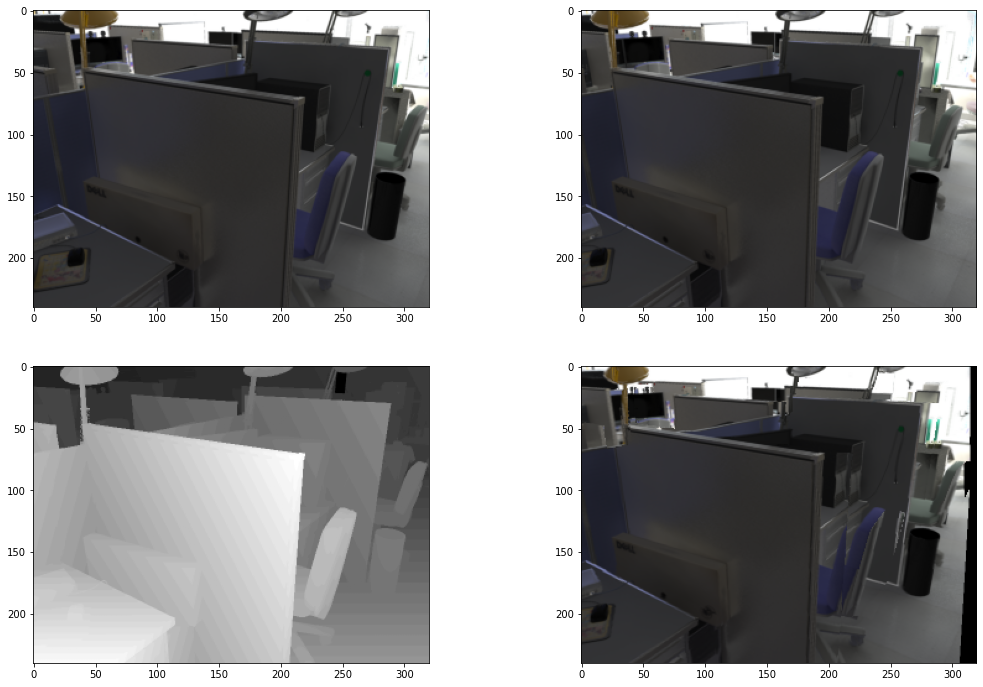

(16, 240, 320, 3) 0.0 0.37459022 1.0


In [21]:
rec = Reconstructor(height=disp_img_batch.shape[1], width=disp_img_batch.shape[2])

rec_img_batch = rec(left_img_batch, disp_img_batch)

# Mostra imagem
index = 2 
f, pos = plt.subplots(2, 2, figsize=(18, 12))
pos[0,0].imshow(left_img_batch[index])
pos[0,1].imshow(right_img_batch[index])
pos[1,1].imshow(rec_img_batch[index])
pos[1,0].imshow(disp_img_batch[index], cmap='gray')
plt.show()

print(rec_img_batch.shape, np.min(rec_img_batch), np.mean(rec_img_batch), np.max(rec_img_batch))

### Erro de reconstrução

0.0 0.94970405 1.0
0.0 0.37459022 1.0
(16, 240, 320, 3) (16, 240, 320, 3) (16, 240, 320, 3)


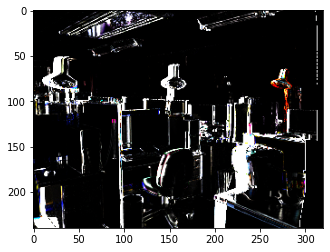

0.0 2.0323298 186.79633


In [22]:
mask = np.copy(rec_img_batch)
mask[mask>1e-8] = 1
print(np.min(mask), np.mean(mask), np.max(mask))

print(np.min(rec_img_batch), np.mean(rec_img_batch), np.max(rec_img_batch))
print(right_img_batch.shape, rec_img_batch.shape, mask.shape)

erro = 255*tf.square(mask*(out_img_batch - rec_img_batch))

index = 0
plt.imshow(erro[index])
plt.show()
print(np.min(erro[index]), np.mean(erro[index]), np.max(erro[index]))

In [23]:
mask = tf.where(rec_img_batch<1e-08,  0., 1.)
print(mask.shape, np.mean(mask), np.mean(rec_img_batch))

(16, 240, 320, 3) 0.94970405 0.37459022


In [24]:
def loss_erro_rec(y_true, y_pred):
    mask = tf.where(y_pred<1e-08,  0., 1.)
    erro = 255*tf.reduce_mean(tf.square(mask*(y_true - y_pred)))
    return erro  

erro = loss_erro_rec(out_img_batch, rec_img_batch)

print(erro.shape, erro.numpy)

() <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.5995482>>


### Rede de extração de catracterísticas

In [32]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Número de filtros básico
nF = 32

# Rede convolucional de extração de características
def rna_carac(input_shape, nF):
    x0 = layers.Input(shape=input_shape)
    
    # Calculo das características das imagens
    x1 = layers.Conv2D(nF, (5,5), padding='same', activation=layers.LeakyReLU())(x0)
    x2 = layers.Conv2D(nF, (5,5), padding='same', use_bias=False)(x1)
    x2 = layers.BatchNormalization()(x2)
    x2 = layers.LeakyReLU()(x2)
    x2 = layers.MaxPool2D(2,2)(x2)

    x3 = layers.Conv2D(nF*2, (5,5), padding='same', activation=layers.LeakyReLU())(x2)
    x4 = layers.Conv2D(nF*2, (5,5), padding='same', use_bias=False)(x3)
    x4 = layers.BatchNormalization()(x4)
    x4 = layers.LeakyReLU()(x4)
    x4 = layers.MaxPool2D(2,2)(x4)

    x5 = layers.Conv2D(nF*4, (5,5), padding='same', activation=layers.LeakyReLU())(x4)
    x6 = layers.Conv2D(nF*4, (5,5), padding='same', use_bias=False)(x5)
    x6 = layers.BatchNormalization()(x6)
    x6 = layers.LeakyReLU()(x6) 
    x6 = layers.MaxPool2D(2,2)(x6)  

    x7 = layers.Conv2D(nF*4, (5,5), padding='same', activation=layers.LeakyReLU())(x6)
    x8 = layers.Conv2D(nF*4, (5,5), padding='same', use_bias=False)(x7)
    x8 = layers.BatchNormalization()(x8)
    x8 = layers.LeakyReLU()(x8)  


    # Cria modelo
    rna_carac = models.Model(x0, x8)
    
    return rna_carac

input_shape = (240, 320, 3)
rnaCV = rna_carac(input_shape, nF)

rnaCV.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 240, 320, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 240, 320, 32)      2432      
                                                                 
 conv2d_13 (Conv2D)          (None, 240, 320, 32)      25600     
                                                                 
 batch_normalization_4 (Batc  (None, 240, 320, 32)     128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 240, 320, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 120, 160, 32)     0         
 2D)                                                       

In [33]:
img_carac = rnaCV(left_img_batch)
print(img_carac.shape)


(16, 30, 40, 128)


## Rede completa

In [34]:
#### Rede de calculo da profundidade ####
input_shape = (img_size[0], img_size[1], 3)

# Define entradas
input_left = tf.keras.layers.Input(shape=input_shape)
input_right = tf.keras.layers.Input(shape=input_shape)

# Extrai características
xL = rnaCV(input_left)
xR = rnaCV(input_right)

# Cocatena com características
ac = layers.Concatenate(axis=-1)([xL, xR])

# Aplica convolução
x2 = layers.Conv2DTranspose(64, (3,3), padding='same', activation='relu', strides=(2,2))(ac)
x2 = layers.Conv2D(64, (3,3), padding='same', activation='relu')(x2)

x3 = layers.Conv2DTranspose(32, (3,3), padding='same', activation='relu', strides=(2,2))(x2)
x3 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(x3)

# Calcula da disparidade
x4 = layers.Conv2DTranspose(16, (3,3), padding='same', activation='relu', strides=(2,2))(x3)
x4 = layers.Conv2D(16, (3,3), padding='same', activation='relu')(x4)

x5 = layers.Conv2D(1, (1,1), padding='same', activation='relu')(x4)

disp_layer = layers.Lambda(lambda x: tf.squeeze(x), name='disp')
disp = disp_layer(x5)

# Imagem da direita reconstruída usando a imagem esquerda e a disparidade
img_rec = rec(input_left, disp)

# Create the Keras model.
rna_stereo = keras.Model(inputs=[input_left, input_right], outputs=[img_rec, disp])                   
             
# Sumário da rede             
rna_stereo.summary()    

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 240, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_6 (InputLayer)           [(None, 240, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_2 (Functional)           (None, 30, 40, 128)  1616960     ['input_5[0][0]',                
                                                                  'input_6[0][0]']          

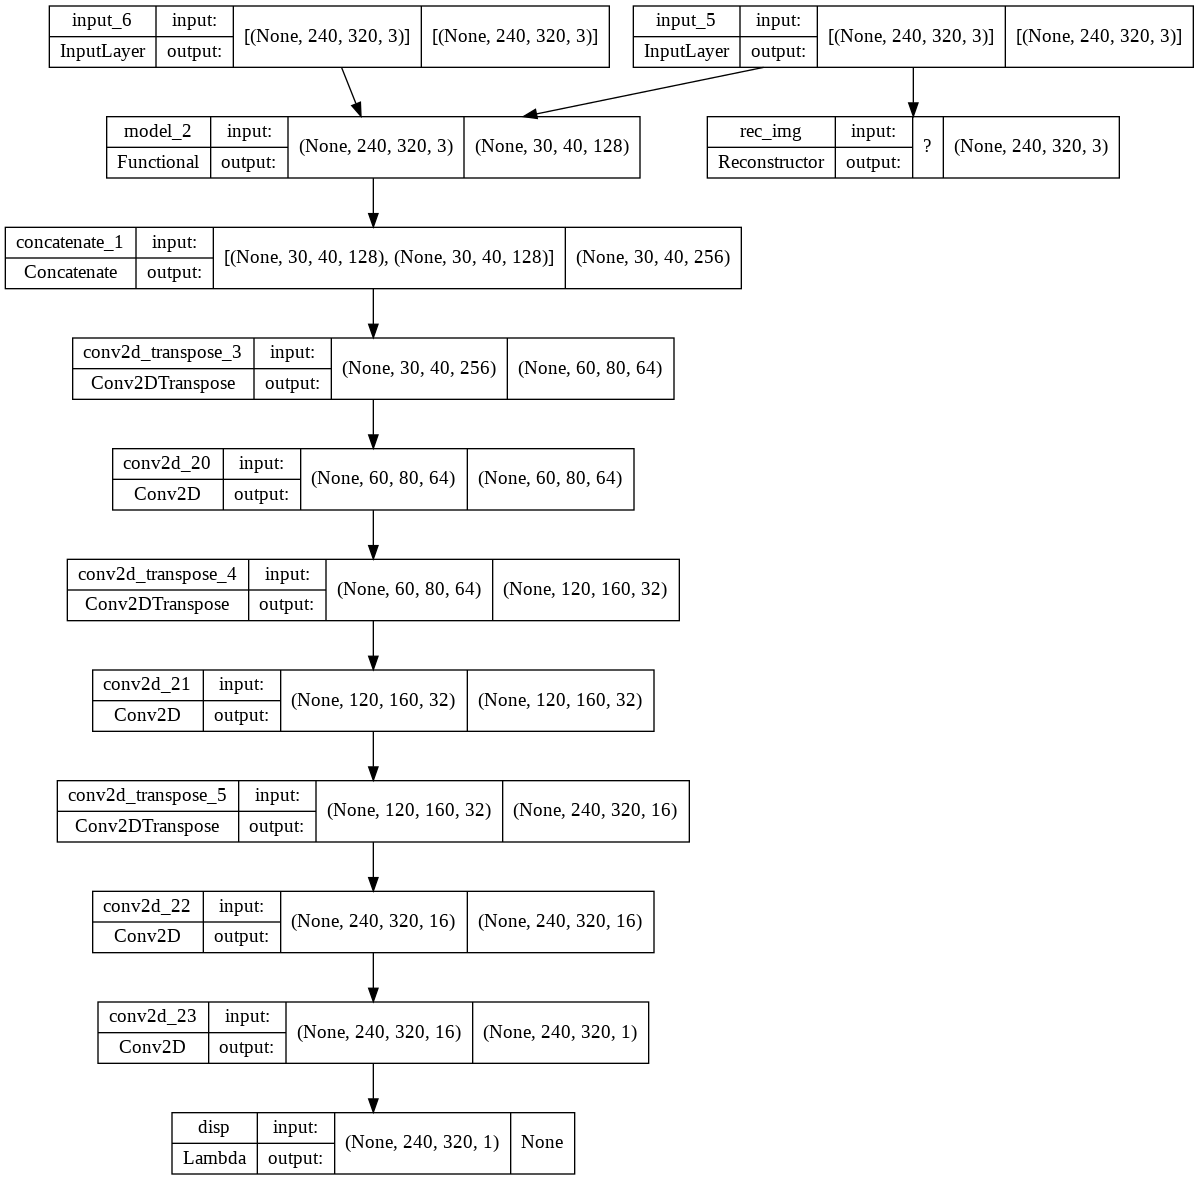

In [35]:
# Gera um esquema gráfico da rede
from tensorflow.keras.utils import plot_model
plot_model(rna_stereo, show_shapes=True, to_file='rna_stereo.png')

In [36]:
img_rec, disp = rna_stereo([left_img_batch, right_img_batch])   
print(img_rec.shape, disp.shape)

(16, 240, 320, 3) (16, 240, 320)


### 4.2 Compilação e treinamento

A compilação da rede é feita usando os seguintes parâmetros:
    
1. Método de otimização: Adam com taxa de aprendizado de 0.001
2. Função de custo: erro quadrático médio (mse)
3. Métrica: erro absoluto médio (mae)

In [37]:
# Importa classe dos otimizadores
from tensorflow.keras import optimizers

# Define otimizador Adam
adam = optimizers.Adam(learning_rate=0.001, decay=1e-03)

# Compilação do autoencoder
rna_stereo.compile(optimizer=adam, 
                   loss={
                         'rec_img': loss_erro_rec, 
                         'disp': 'mse'},
                   loss_weights={
                         'rec_img': 1.0, 
                         'disp': 0.0},
                   metrics={
                         'rec_img': 'mae', 
                         'disp': 'mae'})

O treinamento da rede é realizado usando 100 épocas. 

Como o treinamento é demorado, então, é conveniente utilizar um `callback` para salvar os parâmetros da rede durante o processo de treinamento.

In [38]:
# Importa callback para salvar modelo durante treinamento
from tensorflow.keras.callbacks import ModelCheckpoint

# Define o callback para salvar os parâmetros
checkpointer = ModelCheckpoint('rna_stereo_CVN_REC_weigths', verbose=1, save_best_only=True, save_weights_only=True)

# Treinamento da rede
results = rna_stereo.fit(
          batch_generator(train_left_img_paths, train_right_img_paths, train_disp_img_paths, img_size, fdisp, m_train, batchsize=batch_size),
          steps_per_epoch=train_steps,
          epochs=100,
          validation_data=batch_generator(val_left_img_paths, val_right_img_paths, val_disp_img_paths, img_size, fdisp, m_val, batchsize=batch_size),
          validation_steps=val_steps,
          callbacks=[checkpointer],
          verbose=1)     

Epoch 1/10
93/93 [==============================] - ETA: 0s - loss: 3.7140 - rec_img_loss: 3.7140 - disp_loss: 163.4371 - rec_img_mae: 0.0583 - disp_mae: 9.1825
Epoch 1: val_loss improved from inf to 2.87268, saving model to rna_stereo_CVN_REC_weigths
93/93 [==============================] - 106s 1s/step - loss: 3.7140 - rec_img_loss: 3.7140 - disp_loss: 163.4371 - rec_img_mae: 0.0583 - disp_mae: 9.1825 - val_loss: 2.8727 - val_rec_img_loss: 2.8727 - val_disp_loss: 110.4690 - val_rec_img_mae: 0.0487 - val_disp_mae: 7.0946
Epoch 2/10
93/93 [==============================] - ETA: 0s - loss: 2.3005 - rec_img_loss: 2.3005 - disp_loss: 107.6704 - rec_img_mae: 0.0436 - disp_mae: 7.1624
Epoch 2: val_loss improved from 2.87268 to 2.21602, saving model to rna_stereo_CVN_REC_weigths
93/93 [==============================] - 105s 1s/step - loss: 2.3005 - rec_img_loss: 2.3005 - disp_loss: 107.6704 - rec_img_mae: 0.0436 - disp_mae: 7.1624 - val_loss: 2.2160 - val_rec_img_loss: 2.2160 - val_disp_loss

### 4.3 Salva a rede treinada

Após o término do processo de treinamento a rede e os seus parâmetros são salvos. Pode-se carregar os parâmetros da rede usando.

In [39]:
# Restore the weights
rna_stereo.load_weights('rna_stereo_CVN_REC_weigths')#'my_checkpoint_classic')

### 4.4 Resultados

As células abaixo apresentam os gráficos do processo de treinamento e a avaliação da rede pelo cálculo da função de custo e métrica para os dados de treinamento e validação.

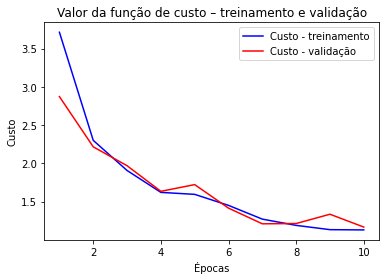

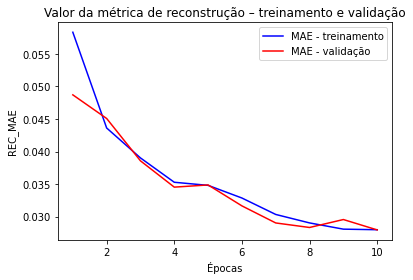

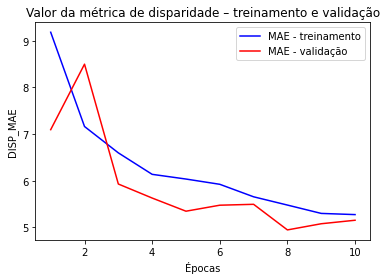

In [40]:
# Obtém dicionário com os resultados do treinamento
results_dict = results.history

# Salva custos, métricas e epocas em vetores 
custo = results_dict['loss']
rec_mae = results_dict['rec_img_mae']
disp_mae = results_dict['disp_mae']
val_custo = results_dict['val_loss']
val_rec_mae = results_dict['val_rec_img_mae']
val_disp_mae = results_dict['val_disp_mae']

# Cria vetor de épocas
epocas = range(1, len(custo) + 1)

# Gráfico dos valores de custo
plt.plot(epocas, custo, 'b', label='Custo - treinamento')
plt.plot(epocas, val_custo, 'r', label='Custo - validação')
plt.title('Valor da função de custo – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico dos valores da métrica
plt.plot(epocas, rec_mae, 'b', label='MAE - treinamento')
plt.plot(epocas, val_rec_mae, 'r', label='MAE - validação')
plt.title('Valor da métrica de reconstrução – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('REC_MAE')
plt.legend()
plt.show()

# Gráfico dos valores da métrica
plt.plot(epocas, disp_mae, 'b', label='MAE - treinamento')
plt.plot(epocas, val_disp_mae, 'r', label='MAE - validação')
plt.title('Valor da métrica de disparidade – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('DISP_MAE')
plt.legend()
plt.show()

In [42]:
custo_metrica_train = rna_stereo.evaluate(batch_generator(train_left_img_paths, train_right_img_paths, train_disp_img_paths, img_size, fdisp, m_train, batchsize=batch_size), steps=train_steps)
custo_metrica_val = rna_stereo.evaluate(batch_generator(val_left_img_paths, val_right_img_paths, val_disp_img_paths, img_size, fdisp, m_val, batchsize=batch_size), steps=val_steps)

18/18 [==============================] - 12s 715ms/step - loss: 1.1669 - rec_img_loss: 1.1669 - disp_loss: 74.7685 - rec_img_mae: 0.0279 - disp_mae: 5.1534


## 5. Previsões da rede

Vamos verificar se a rede desenvolvida é eficaz em realizar segmentação de imagens. Para isso vamos calcular a sua previsão para alguns exemplos  do conjunto de validação e verificar a qualidade o mapa de disparidade e compará-lo com o mapa de dispatidade real.

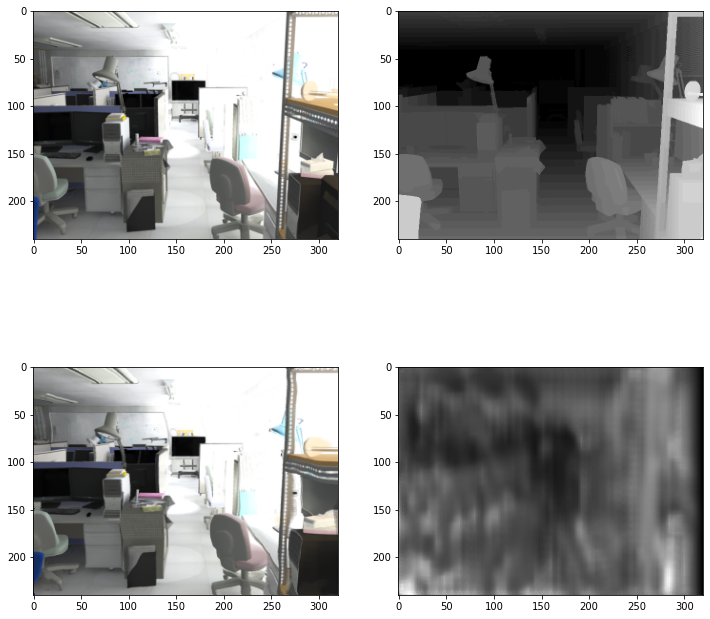

In [43]:
# Instancia o gerador de dados de validação
datagen = batch_generator(val_left_img_paths, val_right_img_paths, val_disp_img_paths, img_size, fdisp, m_val, batchsize=8)

# Gera lote de exemplos de valiação
[left_img_batch, right_img_batch], [out_img_batch, disp_img_batch] = next(datagen) 

# Calcula previsão da rede para o lote de validação gerado
img_prev_batch, disp_prev_batch = rna_stereo.predict([left_img_batch, right_img_batch])

# Seleciona exemplo para análise
index = 6
left_img = left_img_batch[index]
right_img = right_img_batch[index]
disp_img = disp_img_batch[index]
img_prev = img_prev_batch[index]
disp_prev = disp_prev_batch[index]

# Retira eixos dos exemplos
left_img = np.squeeze(left_img)
right_img = np.squeeze(right_img)
disp_prev = np.squeeze(disp_prev)

# Mostra resultados do exemplos slecionado
f, pos = plt.subplots(2, 2, figsize=(12, 12))
pos[0,0].imshow(right_img)
pos[1,0].imshow(img_prev)
pos[0,1].imshow(disp_img, cmap='gray')
pos[1,1].imshow(disp_prev, cmap='gray')
plt.show()

In [44]:
# Calcula erro de previsão disparidade
disp_batch = np.squeeze(disp_prev_batch)
erro = np.mean(100*np.mean(np.abs(disp_batch - disp_img_batch)))/np.mean(disp_img_batch)
print('Erro absoluto médio percentual disparidade (%):', erro)

# Calcula erro de previsão de recosntrução
img_batch = np.squeeze(img_prev_batch)
erro = np.mean(100*np.mean(np.abs(right_img_batch - img_batch)))/np.mean(right_img_batch)
print('Erro absoluto médio percentual recosntrução (%):', erro)

Erro absoluto médio percentual disparidade (%): 35.01195891956725
Erro absoluto médio percentual recosntrução (%): 5.682651658644188


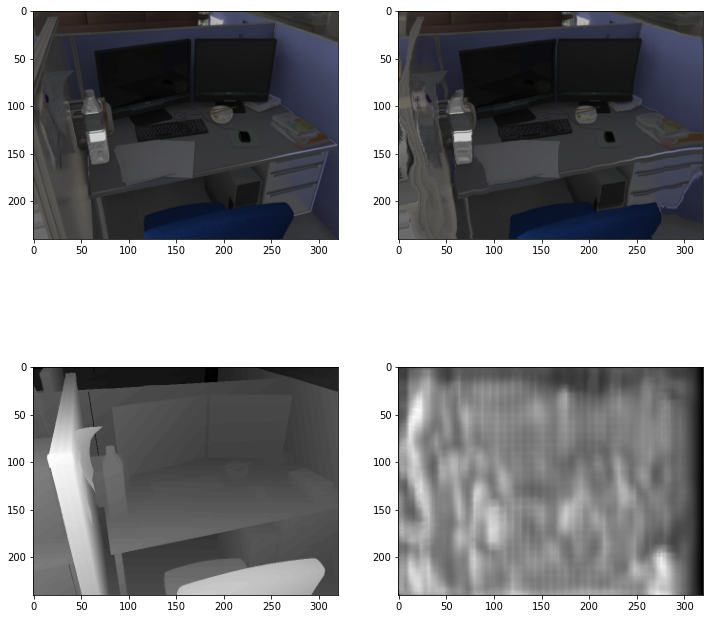

In [45]:
# Seleciona exemplo para análise
index = 1
left_img = left_img_batch[index]
right_img = right_img_batch[index]
disp_img = disp_img_batch[index]
disp_prev = disp_prev_batch[index]
img_prev = img_prev_batch[index]

# Retira eixos dos exemplos
left_img = np.squeeze(left_img)
right_img = np.squeeze(right_img)
disp_prev = np.squeeze(disp_prev)
img_prev = np.squeeze(img_prev)

# Mostra resultados do exemplos slecionado
f, pos = plt.subplots(2, 2, figsize=(12, 12))
pos[0,0].imshow(right_img)
pos[0,1].imshow(img_prev)
pos[1,0].imshow(disp_img, cmap='gray')
pos[1,1].imshow(disp_prev, cmap='gray')
plt.show()

In [46]:
# Calcula erro de previsão 
erro = np.mean(100*np.abs(disp_prev - disp_img))/np.mean(disp_img)
print('Erro absoluto médio percentual (%):', erro)

# Apresenta alguns valores das imagens segmentadas
print(disp_prev[index,:].astype(int))
print(disp_img[index,:].astype(int))
print((disp_img[index,:]-disp_prev[index,:]).astype(int))

Erro absoluto médio percentual (%): 26.348003
[ 4  6  7  7  7  8  8  8  8  9  9 10 10 11 11 11 10 11 11 12 11 13 12 13
 12 14 13 14 13 15 14 14 14 14 13 13 12 12 12 11 10 10 10  9  9  9  9  9
  8  8  8  8  8  9  9  9  9 10 10 11 11 12 12 12 11 12 11 11 11 11 11 11
 11 11 11 11 11 12 11 11 11 11 11 11 11 12 11 11 11 11 11 11 11 12 12 11
 11 12 11 11 11 12 11 11 11 11 11 10 10 11 11 10 10 11 10 10 10 11 11 11
 10 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 10 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 10 10  9  9  9  8  8  8  8
  8  8  9  8  9  9  9  8  8  8  8  8  8  8  8  8  8  8  9  8  9  9  9  9
  9  9  9  8  8  9  9  9  9 10 10 10 10 10 10 10 10  9  9  8  8  8  8  8
  8  9  9  9  9 10 10 10 10 11 11 11 11 11 11 11 10 11 11 10 10 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 10 11 11 11 10 11 11 11 11 11 11 10
 10 10 10 10  9 10 10 10  9 10 10 10 10 10 10 10  9  9  9  9  9  9  9  8
  8  8  8  8  8  9  9  9  9  9  9  8  8  8  8  7  7  7  7  6  6  6  6  5
  5  

### Teste com imagens diferentes

Tem que carregar a imagem.

In [47]:
from keras.preprocessing.image import load_img, img_to_array

left_imagem = load_img('im0.png')
right_imagem = load_img('im1.png')
disp_imagem = load_img('disp0.jpg')

img_left = img_to_array(left_imagem)
img_right = img_to_array(right_imagem)
disp = img_to_array(disp_imagem)

print(img_left.shape, img_right.shape, disp.shape)
print(np.max(img_left), np.max(img_right), np.max(disp))

FileNotFoundError: ignored

In [ ]:
img_left = tf.image.resize(img_left, img_size)/255.
img_right = tf.image.resize(img_right, img_size)/255.
disp = tf.image.resize(disp, img_size).numpy()
disp = disp[:,:,0]*320/2872

img_left = np.expand_dims(img_left, axis=0)
img_right = np.expand_dims(img_right, axis=0)

print(img_left.shape, img_right.shape, disp.shape)
print(np.max(img_left), np.max(img_right), np.max(disp))

(1, 240, 320, 3) (1, 240, 320, 3) (240, 320)
0.9287583 0.90593284 28.412256


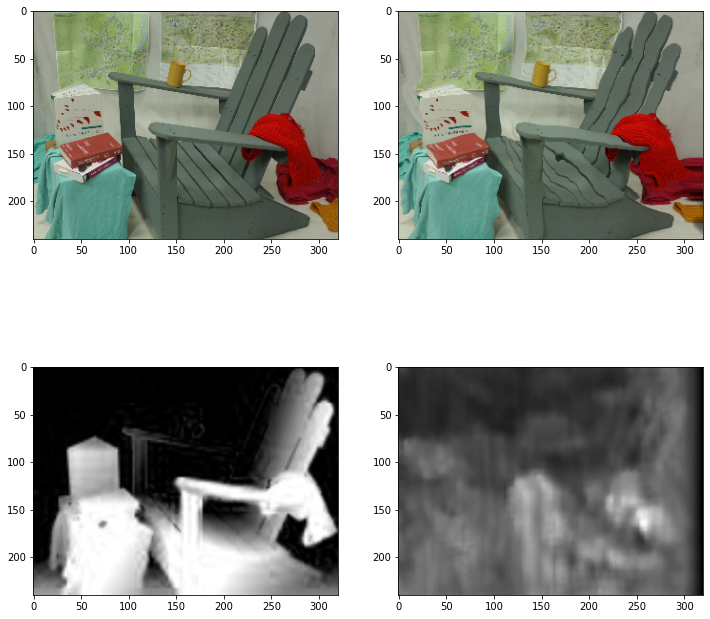

In [ ]:
# Mostra resultados do exemplos selecionado
img_prev, disp_prev = rna_stereo.predict([img_left, img_right])

f, pos = plt.subplots(2, 2, figsize=(12, 12))
pos[0,0].imshow(img_right[0])
pos[0,1].imshow(img_prev[0])
pos[1,0].imshow(disp, cmap='gray')
pos[1,1].imshow(disp_prev, cmap='gray')
plt.show()

In [ ]:
# Calcula erro de previsão 
erro = np.mean(100*np.abs(disp_prev - disp))/np.mean(disp)
print('Erro absoluto médio percentual (%):', erro)

# Apresenta alguns valores das imagens segmentadas
print(disp_prev[128,:].astype(int))
print(disp[128,:].astype(int))
print(disp[128,:].astype(int) - disp_prev[128,:].astype(int))

Erro absoluto médio percentual (%): 74.278114
[11 11 11 11 11 11 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 12 12 12
 12 12 12 12 13 13 13 12 12 12 12 11 11 11 12 12 12 12 12 12 12 12 13 13
 13 13 13 13 13 13 13 13 13 14 14 14 14 16 17 17 17 17 17 16 16 16 15 15
 15 15 14 14 13 13 13 13 13 13 13 13 13 12 12 11 11 11 11 11 11 11 11 11
 11 11 11 11 10 10 10 10 10 10 10 10 10 10  9  9  9 11 12 14 16 17 19 20
 21 22 23 24 25 26 26 27 28 28 28 28 28 27 27 26 26 26 25 25 24 24 24 23
 23 22 23 22 22 24 25 26 27 27 27 27 28 27 27 26 26 25 23 22 21 20 19 18
 17 17 16 15 14 14 14 13 13 13 13 12 12 11 11 11 10 10 10 10 11 11 11 11
 11 12 13 14 15 16 17 17 18 18 18 18 18 18 18 18 18 18 17 17 17 16 15 15
 15 15 15 15 15 16 17 19 20 20 20 20 20 21 21 21 21 22 22 22 23 23 23 23
 23 23 23 23 24 23 23 23 23 22 21 20 20 19 17 17 16 15 15 15 15 14 15 15
 15 15 16 17 17 17 18 18 18 18 17 17 17 16 17 16 16 16 16 16 16 16 16 16
 16 15 15 15 15 14 14 14 13 13 13 13 13 13 12 12 12 11 11 10  9  9  8  7
  6  

In [ ]:
# Calculo do erro de reconstrução
erro_rec = np.mean(100*np.abs(img_prev - img_right))/np.mean(img_right)
print('Erro absoluto médio percentual (%):', erro_rec)

Erro absoluto médio percentual (%): 10.757982
